<code>
    
    Ques 1 : Can You Tell the Words which are Close in Meaning (can Say Synonyms but not not exactly) 
             used in Data provided ?
             
             Example : What a magnificent catch.
                       What a Super Catch.
                       What a tremendous Catch.
                       What a spectacular Catch.
                       What a impressive Catch.
                       
            (Remember All the Words Must Be used in Data)
             
            input : Magnificient
            output : Super, tremendous , Spectacular , impressive ....
</code>

<code>
    
    Ques 2 : In This Type of Dataset (Multiclass Classification) Which Machine Learning Algorithms 
             will Perform Good and Which Algo Will Perform Worse ? 
    
             Give a Well Define Table having Name of Algorithm , 
             (Accuracy , Precision Score, Recall Score, F1 Score) on both Training And Validating Dataset.
    
            
             Then conclude the Algo according to above Observation
    
</code>

<code>
Ques 3 : What are the Most Common Words used in The Dataset Provided for Evaluation of Model.
</code>

<code>
    
    Ques 4 : For a given Sentence predict the Class among classes with Maximum Probability of 
             belonging the Sentence to That Class
            
    
    
    
    
</code>

<code>
Dependent Variable : Labels of News (Technology, Sports, Business...)
Independent Variable : News Article
Models/Classifiers : Naive Bayes, Random Forest, KNN, Decision Tree Classifier, Mlultilayer Perceptron
Ensemble Technique : Voting and Bagging
</code>

<code>
    
    
</code>

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [2]:
#Voting LibS
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [3]:
URL = "bbc-text.csv"

In [4]:
columns=["Title","Train_Accuracy","Train_Precision","Train_Recall","Train_F1-Score","Valid_Accuracy","Valid_Precision","Valid_Recall","Valid_F1-Score"]
Models_data = pd.DataFrame(columns=columns)

In [5]:
#Models_data.append(dict(zip(columns,["Gaurav",10,10,10,10,10,10,10])),ignore_index=True)

In [6]:
#another Method to read csv
# category=[]
# text=[]
# with open(URL,'r') as csv_read:
#     read=csv.reader(csv_read,delimiter=',')
#     next(read)
#     for i,k in read:
#         category.append(i)
#         text.append(k)
#

In [7]:
data=pd.read_csv(URL)
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [8]:
data.isnull().any()

category    False
text        False
dtype: bool

In [9]:
data.isna().any()

category    False
text        False
dtype: bool

In [10]:
data[data.category.str.len()==0]

,category,text


In [11]:
data[data.text.str.len()==0]

,category,text


In [12]:
labels=data.category.unique().tolist()
labels

['tech', 'business', 'sport', 'entertainment', 'politics']

In [13]:
tech_news=data[data.category =='tech'].count()[0]
tech_news

401

In [14]:
business_news=data[data.category =='business'].count()[0]
business_news

510

In [15]:
sports_news = data[data.category =='sport'].count()[0]
sports_news

511

In [16]:
entr_news=data[data.category =='entertainment'].count()[0]
entr_news

386

In [17]:
politics_news=data[data.category =='politics'].count()[0]
politics_news

417

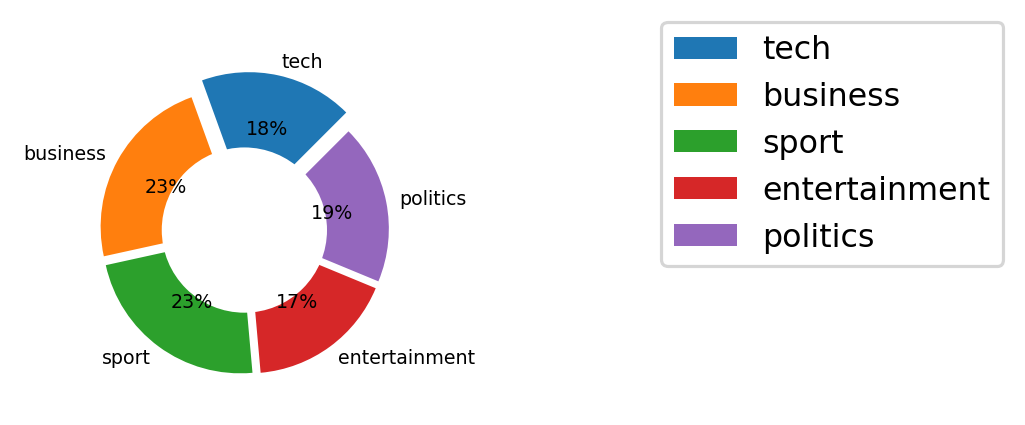

In [18]:
#pie chart visualisation of category of NEWS
size=[tech_news,business_news,sports_news,entr_news,politics_news]
plt.figure(figsize=(2,2),dpi=228)
offset = [0.15, 0.05, 0.05, 0.05,0.05]
plt.pie(size,labels=labels,textprops={'fontsize':6},startangle=45,autopct='%1.0f%%', explode=offset)

centre_circle = plt.Circle((0, 0), radius=0.60, fc='white')
plt.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor =(2.75, 1.15))
plt.show()

# Preprocessing + NLP

In [19]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
#initilize
lammitizer=WordNetLemmatizer()
stemmer=PorterStemmer()

In [20]:
#Label Encoding of Catagory into respective numaric value
data.category.replace(labels,[0,1,2,3,4],inplace=True)

In [21]:
data.head()

,category,text
0,0,tv future in the hands of viewers with home th...
1,1,worldcom boss left books alone former worldc...
2,2,tigers wary of farrell gamble leicester say ...
3,2,yeading face newcastle in fa cup premiership s...
4,3,ocean s twelve raids box office ocean s twelve...


In [22]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "us","up", "very", "was", "we", "we'd", "we'll", "we're", "we've","will","well","shall", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you","your's" "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves","one","two","three","four","five","six","seven","ten","eight","nine","hundred","thousand","million","billion","doller","time","year","date"]
stopwords.sort()

In [23]:
# continue
# hold
# remain
# occur
# means
# one
#"time" 
#"year"
#'take' 

In [24]:
var={}
var['<00v>']=0
index_=1
def cleaning(message):
    message = re.sub(r'([!,.@$%&<>?:;()+-/^0-9|]+)|(http\S+)|(#\S+)', '', message)
    message=re.sub(r'[#@]\S+',"",message)
    message=re.sub(r'\.',"",message)
    #words=word_tokenize(message)
    words=message.split()
    filtered_words =[stemmer.stem(word.lower()) for word in words if not word.lower() in stopwords]
    return filtered_words
def Word_Embedding(words):
    global var
    global index_
    for word in words:
        if word in var:
            continue
        else:
            var[word]=index_
            index_+=1

# Train Test Validation Split 
##### Ratio 6:2:2

In [25]:
X_train = data.text[:1335]
X_valid = data.text[1335:1780]
X_test  = data.text[1780:]

In [26]:
y_train = data.category[:1335]
y_valid = data.category[1335:1780]
y_test  = data.category[1780:]

In [27]:
X_train.shape

(1335,)

In [28]:
y_train.head()

0    0
1    1
2    2
3    2
4    3
Name: category, dtype: int64

## Cleaning and Word Embedding

In [29]:
%%time
X_train = X_train.apply(cleaning)

X_valid = X_valid.apply(cleaning)
X_test = X_test.apply(cleaning)

CPU times: user 17.6 s, sys: 19.8 ms, total: 17.6 s
Wall time: 17.6 s


In [30]:
X_test

1780    [hobbit, pictur, year, away, lord, ring, direc...
1781    [game, firm, hold, cast, audit, video, game, f...
1782    [clark, plan, migrant, point, scheme, anyon, p...
1783    [radcliff, compet, london, paula, radcliff, co...
1784    [serena, becom, world, number, serena, william...
                              ...                        
2220    [car, pull, retail, figur, retail, sale, fell,...
2221    [kilroy, unveil, immigr, polici, exchatshow, h...
2222    [rem, announc, new, glasgow, concert, band, re...
2223    [polit, squabbl, snowbal, s, becom, commonplac...
2224    [souness, delight, euro, progress, boss, graem...
Name: text, Length: 445, dtype: object

# Creating A Word Cloud

In [31]:
from PIL import Image
from wordcloud import WordCloud

In [32]:
WC_Tokens=X_train.to_list()
WC_Tokens=sum(WC_Tokens,[])

# Answer 3 : Most Occuring Words

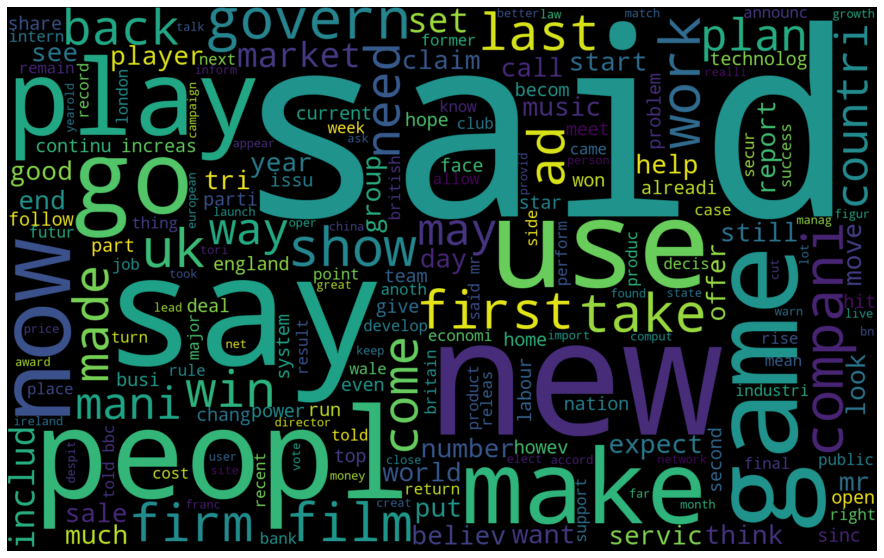

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure( figsize=(20,10) )
word_cloud = WordCloud(width=1600, height=1000).generate(" ".join(WC_Tokens))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show(word_cloud)
plt.savefig('words.png')

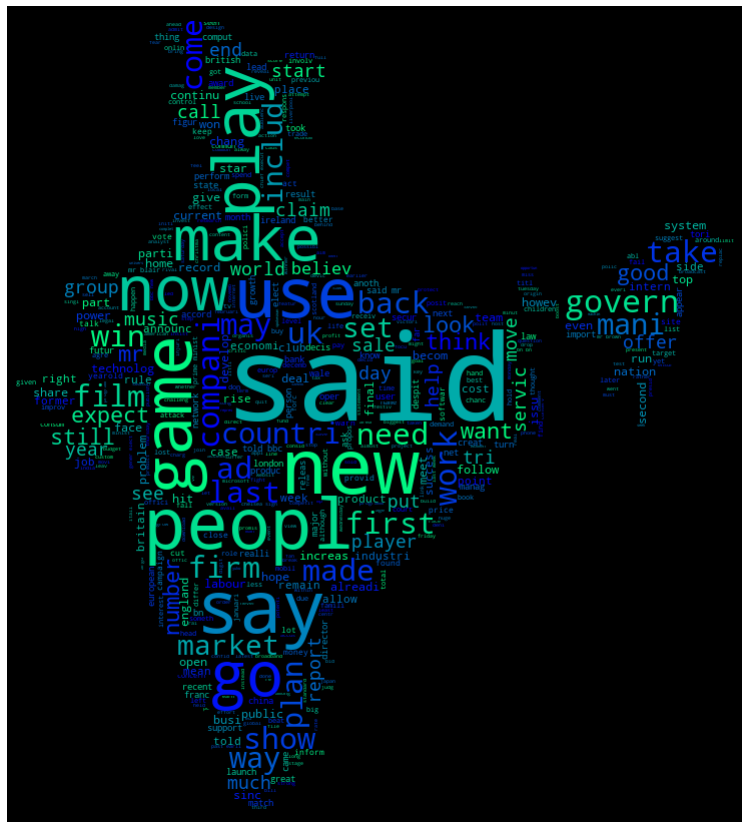

In [34]:
img=Image.open("Wordcloud/India.png")
image_mask = Image.new(mode='RGB', size=img.size, color=(255, 255, 255))
image_mask.paste(img, box=img)
rgb_array = np.array(image_mask) # converts the image object to an array
plt.figure( figsize=(25,15) )
word_cloud = WordCloud(mask=rgb_array, background_color='black', 
                      max_words=500, colormap='winter').generate(" ".join(WC_Tokens))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show(word_cloud)

In [35]:
#plt.savefig('common_words.png')

In [36]:
#Word Embedding only in train
X_train.apply(Word_Embedding)

0       None
1       None
2       None
3       None
4       None
        ... 
1330    None
1331    None
1332    None
1333    None
1334    None
Name: text, Length: 1335, dtype: object

In [37]:
print(f"There are total  {len(var)} in Our Words Dictonary")

There are total  17331 in Our Words Dictonary


In [38]:
#average no of Words in News article
X_train.apply(len).mean(),X_train.apply(len).max(),X_train.apply(len).min()

(221.58501872659176, 2288, 47)

# Create a Sparse Matrix for the Given Data

In [39]:
WORDS = 300

In [40]:
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [41]:
print(f'\'{X_train[50][50]}\' is present at index {var[X_train[50][50]]} in our Word Embedding')
print(f'\'{X_train[250][20]}\' is present at index {var[X_train[250][20]]} in our Word Embedding')
print(f'\'{X_train[1150][50]}\' is present at index {var[X_train[1150][50]]} in our Word Embedding')

'let' is present at index 1292 in our Word Embedding
'edelman' is present at index 7592 in our Word Embedding
'fundament' is present at index 2763 in our Word Embedding


In [42]:
%%time
train_sparse = np.zeros(shape=(X_train.shape[0],300),dtype=int)
#sparse matrix filling
for i in range(train_sparse.shape[0]):
    for j in range(train_sparse.shape[1]):
        try:
            train_sparse[i][j]=var.get(X_train[i][j],0)
        except:
            train_sparse[i][j] = 0
    

CPU times: user 3.08 s, sys: 0 ns, total: 3.08 s
Wall time: 3.08 s


In [43]:
train_sparse

array([[   1,    2,    3, ...,  193,  194,  195],
       [ 247,  248,  249, ...,    0,    0,    0],
       [ 355,  356,  357, ...,    0,    0,    0],
       ...,
       [2405, 2406, 4808, ...,    0,    0,    0],
       [8717,  616,  242, ...,  451, 1334,  331],
       [2017, 1905, 2009, ...,    0,    0,    0]])

In [44]:
train_sparse[5]

array([675, 638, 406, 676, 677, 678, 675, 137, 277, 339, 679, 680, 440,
       681,  62, 682, 676,  29, 683, 684, 685, 686, 236, 687,  63, 688,
       452, 524, 137, 683,  63, 689, 690, 691, 680, 638,   5, 188, 679,
       260, 277, 680, 690, 692, 231, 693, 694, 201, 695, 696, 192, 697,
       698, 684, 188, 675, 137, 188, 679, 440, 699, 124, 121, 382,  63,
       116,  40, 188, 675,  63, 700, 701,  63, 692, 702,  96, 703, 704,
       254, 680, 440, 705,  62, 682, 676,  69, 685, 685, 706, 188, 675,
       124, 687, 683, 707, 360, 707, 277, 707, 708, 306, 425, 709, 710,
       711, 712, 713, 714, 715, 339, 679, 224, 238, 676, 548, 716, 185,
       694, 201, 695, 696, 192, 697, 698, 684, 717, 718, 719, 720, 721,
       188, 675,  63, 267, 201, 382,  63, 722,  40, 683,  89, 684, 723,
       724, 288, 186,  17, 725, 678, 675,  63,  12, 726, 288,  96,  71,
       703,  77, 204, 217, 117, 150, 395, 727, 728, 729, 730, 188, 675,
       137, 680, 731, 732, 733, 734, 570, 735, 736, 737, 738, 73

In [45]:
%%time
valid_sparse = np.zeros(shape=(X_valid.shape[0],300),dtype=int)
#sparse matrix filling
for i in range(valid_sparse.shape[0]):
    for j in range(valid_sparse.shape[1]):
        try:
            valid_sparse[i][j]=var.get(X_valid[i][j],0)
        except:
            valid_sparse[i][j] = 0


CPU times: user 1.05 s, sys: 4.08 ms, total: 1.05 s
Wall time: 1.05 s


In [46]:
valid_sparse[15]

array([ 2762,  2547,  4054,  1537,   160,  2762,  2547,   127,   885,
        1797,   294,  8987,  4054,  1759,  1995,    38,  2324,  7363,
       11739,   137,   614,     0,  1995,    21,   738,  3328, 16641,
        1066, 11739,   137,   345,   118,  1933,  1975,  8518,  1303,
        1995,    63,  1466,   137,  9821,   262,   295,   297,   395,
         360,  1329,   716,   297,  9639,   160,   993,  1210,  2477,
        1451,  4382,  1518,   345,  1297,  1388,  5941,  2706,   340,
        3904,  1554,  1995,    63,   126, 11739,   137,   927,   160,
         614,    21,   392,  1359,   799,  2762,  2547,  1226,  1917,
        3916,   148,   991,   379,  1312,   909,   716,   377,  1325,
         127,   885,  1797,   185, 10499,   821,    89,  1871,   125,
        1320,  1995,  2762,  2547,  1772,   173,  4272,  2795,   441,
        2706,  1995,    79,    69,  2156,   988,   482,  1063,  1324,
        1979,   345,   118,    80,  1919,  2477,    63,   602,  1094,
        1936,  7525,

In [47]:
%%time
test_sparse = np.zeros(shape=(X_test.shape[0],300),dtype=int)
#sparse matrix filling
for i in range(test_sparse.shape[0]):
    for j in range(test_sparse.shape[1]):
        try:
            test_sparse[i][j]=var.get(X_test[i][j],0)
        except:
            test_sparse[i][j] = 0

CPU times: user 1.08 s, sys: 0 ns, total: 1.08 s
Wall time: 1.08 s


In [48]:
test_sparse[2]

array([ 2017,   754, 11186,  1288,  2367,  2018,   754,    13,    65,
         848,  2561,   691,    90,  1922,   703,     5,   718,  2016,
        2017,   137,   726,  1288,     7,  1645,   951,    63,  1355,
         755,     7,   754,   680,   188,  2017,  5943,   754,   285,
         137,  2907,  1696,   169,    65,   844,  1842,  1053,  2854,
        2855,   360,   319,   754,   680,  6073,  3939,   137,   687,
        1407,  1512,   153,   128,  1220,   687,  6072,   137,   884,
        2459,   153,   683,   701,  1449,  3163,    21,    89,    79,
        1885,   734,   680,  3387,   755,     5,   718,   137,    73,
         134,  1218,  3116,  1812,    65,  5125,  1975,  1059,    90,
         185,  2327,   703,  1492,   121,    63,  5999,  6000,   137,
        2907, 11186,   364,  1165,   703,   782,  1842,  1053,   844,
        1059,    89,  1679,  4986,  1437,   137,  5997,     7,   319,
         418,  2114,   327,    17,   851,   773,   173,   703,  1059,
         773,   343,

##### Ab <i>DANGAL</i> hoga

# Model

In [49]:
import tensorflow as tf

/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(var),output_dim=20,input_length=WORDS))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=36,activation='relu'))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(units=5,activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 20)           346620    
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
_________________________________________________________________
dense (Dense)                (None, 36)                216036    
_________________________________________________________________
dropout (Dropout)            (None, 36)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 185       
Total params: 562,841
Trainable params: 562,841
Non-trainable params: 0
_________________________________________________________________


In [52]:
#complile Model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
#hyperparamenters
num_epochs = 15
history = model.fit(train_sparse, y_train, epochs=num_epochs, validation_data=(valid_sparse, y_valid), verbose=2)

Train on 1335 samples, validate on 445 samples
Epoch 1/15
1335/1335 - 1s - loss: 1.5874 - acc: 0.2292 - val_loss: 1.5605 - val_acc: 0.2944
Epoch 2/15
1335/1335 - 0s - loss: 1.5147 - acc: 0.3243 - val_loss: 1.4788 - val_acc: 0.3910
Epoch 3/15
1335/1335 - 0s - loss: 1.3511 - acc: 0.4285 - val_loss: 1.2366 - val_acc: 0.5843
Epoch 4/15
1335/1335 - 0s - loss: 1.0427 - acc: 0.5768 - val_loss: 0.8269 - val_acc: 0.8022
Epoch 5/15
1335/1335 - 0s - loss: 0.7448 - acc: 0.7004 - val_loss: 0.5466 - val_acc: 0.9101
Epoch 6/15
1335/1335 - 0s - loss: 0.5304 - acc: 0.7798 - val_loss: 0.3601 - val_acc: 0.9483
Epoch 7/15
1335/1335 - 0s - loss: 0.4569 - acc: 0.8015 - val_loss: 0.2529 - val_acc: 0.9551
Epoch 8/15
1335/1335 - 0s - loss: 0.4228 - acc: 0.8202 - val_loss: 0.2064 - val_acc: 0.9528
Epoch 9/15
1335/1335 - 0s - loss: 0.3445 - acc: 0.8434 - val_loss: 0.1723 - val_acc: 0.9573
Epoch 10/15
1335/1335 - 0s - loss: 0.3116 - acc: 0.8682 - val_loss: 0.1412 - val_acc: 0.9640
Epoch 11/15
1335/1335 - 0s - los

# Visualizing The results

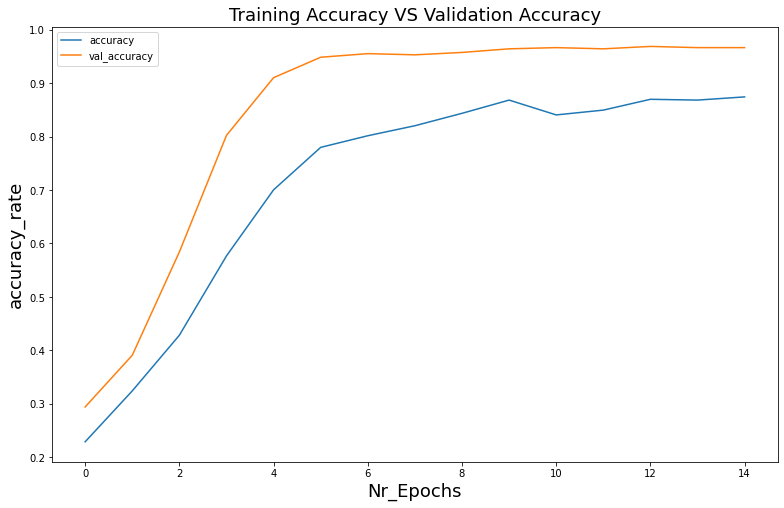

In [54]:
plt.figure(figsize=(13,8))
plt.title("Training Accuracy VS Validation Accuracy",fontsize=18)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel("Nr_Epochs",fontsize=18)
plt.ylabel('accuracy_rate',fontsize=18)
plt.legend(['accuracy', 'val_accuracy'])
#plt.legend(bbox_to_anchor =(2.75, 1.15))
plt.show()

In [55]:
history.history

{'loss': [1.5873777838681968,
  1.5147449103187534,
  1.3511397984143947,
  1.0426662030737945,
  0.7448273491770141,
  0.5304285367329915,
  0.4569227576702275,
  0.42282979675893034,
  0.34452733629651733,
  0.3116029615259349,
  0.3254854220576054,
  0.32416541072982974,
  0.2770273813370908,
  0.2769857216305501,
  0.26823845336053254],
 'acc': [0.22921348,
  0.32434458,
  0.4284644,
  0.576779,
  0.70037454,
  0.77977526,
  0.8014981,
  0.8202247,
  0.8434457,
  0.8681648,
  0.84044945,
  0.8494382,
  0.86966294,
  0.8681648,
  0.8741573],
 'val_loss': [1.5604620550455672,
  1.4788157428248545,
  1.2366024885284768,
  0.8268715380282884,
  0.5466139418355535,
  0.36009926809353776,
  0.25285324213210114,
  0.20640542557400265,
  0.17229305723409974,
  0.14124383548002564,
  0.13454045566280237,
  0.1319089580871416,
  0.11028354351272744,
  0.11322474040593324,
  0.11052089480871564],
 'val_acc': [0.29438204,
  0.39101124,
  0.58426964,
  0.80224717,
  0.9101124,
  0.9483146,
  0.

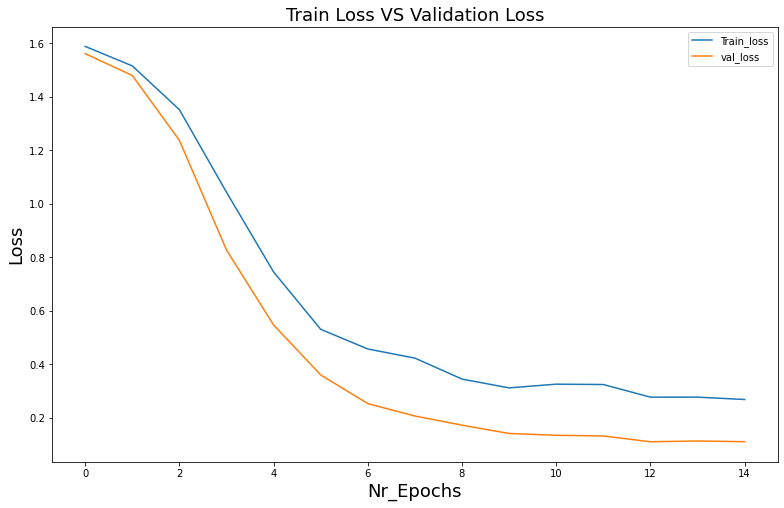

In [56]:
plt.figure(figsize=(13,8))
plt.title("Train Loss VS Validation Loss",fontsize=18)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Nr_Epochs",fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend(['Train_loss', 'val_loss'])
plt.show()

<code>
    Observation :
    A- (Nr_epochs = 10)
    1- By Adding Dropout Layer Train Accuracy decrease to 87 % which was 100%
    2- By Adding Dropout Layer Validation Accuracy remain to 95%
    3- This Signify that Our Model is Performing better in Validation Data which is Good 
        Result
    
    B- By increasing Epoch to 15 from 10 
        Both Train Accuracy and  Validation Accuracy increases by 2%
    </code>

In [57]:
y_test=y_test.reset_index(drop=True)

In [58]:
prediction_test = model.predict(test_sparse)
prediction_test[0]

array([1.2185907e-03, 2.2361623e-03, 4.2106742e-03, 9.9183369e-01,
       5.0084700e-04], dtype=float32)

In [59]:
corr = 0
incorr = 0
for i in range(y_test.shape[0]):
    if np.argmax(prediction_test[i]) ==y_test[i]:
        corr += 1
    else:
        incorr += 1


In [60]:
Model1_Percent_Correct_pred_test = corr / (corr+incorr) * 100
Model1_Percent_Correct_pred_test

97.07865168539325

In [61]:
#inferance :
print(f"Accuracy Of Model is \ntrain = {model.history.history['acc'][-1] * 100} \nValidation = {model.history.history['val_acc'][-1] * 100} \nTest = {Model1_Percent_Correct_pred_test}")

Accuracy Of Model is 
train = 87.41573095321655 
Validation = 96.6292142868042 
Test = 97.07865168539325


In [62]:
Y_Train=[np.argmax(i) for i in model.predict(train_sparse)]
Y_valid=[np.argmax(i) for i in model.predict(valid_sparse)]

In [63]:
print(precision_score(y_train,Y_Train,average='macro'))
print(recall_score(y_train,Y_Train,average='micro'))
print(f1_score(y_train,Y_Train,average='weighted'))

1.0
1.0
1.0


In [64]:
Models_data=Models_data.append(dict(zip(columns,["Multi Layer Perceptron",model.history.history['acc'][-1] * 100,100*precision_score(y_train,Y_Train,average='macro'),100*recall_score(y_train,Y_Train,average='micro'),100*f1_score(y_train,Y_Train,average='weighted'),model.history.history['val_acc'][-1] * 100,100*precision_score(y_valid,Y_valid,average='macro'),100*recall_score(y_valid,Y_valid,average='macro'),100*f1_score(y_valid,Y_valid,average='macro')])),ignore_index=True)

In [65]:
Models_data

,Title,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Valid_Accuracy,Valid_Precision,Valid_Recall,Valid_F1-Score
0,Multi Layer Perceptron,87.415731,100.0,100.0,100.0,96.629214,96.585538,96.62138,96.581221


# Model 2 Naive Bayes

###### Here we are using MultinomialNB

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import recall_score, precision_score, f1_score

In [67]:
def preprocessing(message):
    message = re.sub(r'([!,.@$%&<>?:;()+-/^0-9|]+)|(http\S+)|(#\S+)', '', message)
    message=re.sub(r'[#@]\S+',"",message)
    message=re.sub(r'\.',"",message)
    #words=word_tokenize(message)
    words=message.split()
    filtered_words =[stemmer.stem(word.lower()) for word in words if not word.lower() in stopwords]
    return " ".join(filtered_words)

Basics = https://kavita-ganesan.com/how-to-use-countvectorizer/#.X2NfctnhW5c

CountVectorizer = https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Execution = https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [68]:
# 1- The goal of MIN_DF is to ignore words that have very few occurrences to be considered meaningful
# 2- MAX_DF is to ignore words that are too common (0.0 - 1.0)
# 3- The default tokenization in CountVectorizer removes all special characters, 
#    punctuation and single characters. If this is not the behavior you desire, 
#    and you want to keep punctuation and special characters, 
#    you can provide a custom tokenizer to CountVectorizer
# 4- Custom Preprocessing preprocessor=cleaning
# 5 -Working With N-Grams
vector = CountVectorizer(stop_words=stopwords,preprocessor=preprocessing)
#vector.get_stop_words()
vector.build_analyzer()

functools.partial(<function _analyze at 0x7fe06eca6170>, ngrams=<bound method _VectorizerMixin._word_ngrams of CountVectorizer(preprocessor=<function preprocessing at 0x7fe0683930e0>,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
                            'be', 'because', 'been', 'before', 'being', 'below',
                            'between', 'billion', 'both', 'but', 'by', 'could',
                            'date', 'did', 'do', 'does', ...])>, tokenizer=<built-in method findall of re.Pattern object at 0x7fe066bb7850>, preprocessor=<function preprocessing at 0x7fe0683930e0>, decoder=<bound method _VectorizerMixin.decode of CountVectorizer(preprocessor=<function preprocessing at 0x7fe0683930e0>,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
               

In [69]:
#vector.get_params()

In [70]:
vector.build_preprocessor()

<function __main__.preprocessing(message)>

In [71]:
#fit_transform(raw_documents[, y])   >>    Learn the vocabulary dictionary and return document-term matrix.

In [72]:
%%time
data_cleaned = vector.fit_transform(data.text)

CPU times: user 18.1 s, sys: 10.5 ms, total: 18.1 s
Wall time: 18.1 s


In [73]:
#vector.get_feature_names()

In [74]:
# get the total vocab
#print(vector.vocabulary_)

In [75]:
#vector.fit_transform([data.text[0],data.text[1],data.text[2]])

#### All data is Stored in "data_cleaned" in Compressed Sparse Row format 
for more details about CSR :

In [76]:
X_train = data_cleaned[:1335]
X_valid = data_cleaned[1335:1780]
X_test  = data_cleaned[1780:]

In [77]:
y_train = data.category[:1335]
y_valid = data.category[1335:1780]
y_test  = data.category[1780:]

In [78]:
#setup the Classifier
classifier = MultinomialNB()

In [79]:
#fitting
classifier.fit(X_train, y_train)

MultinomialNB()

In [80]:
nr_correct_train = (y_train == classifier.predict(X_train)).sum()
nr_correct_train

1328

In [81]:
nr_incorrect_train = y_train.size - nr_correct_train
nr_incorrect_train

7

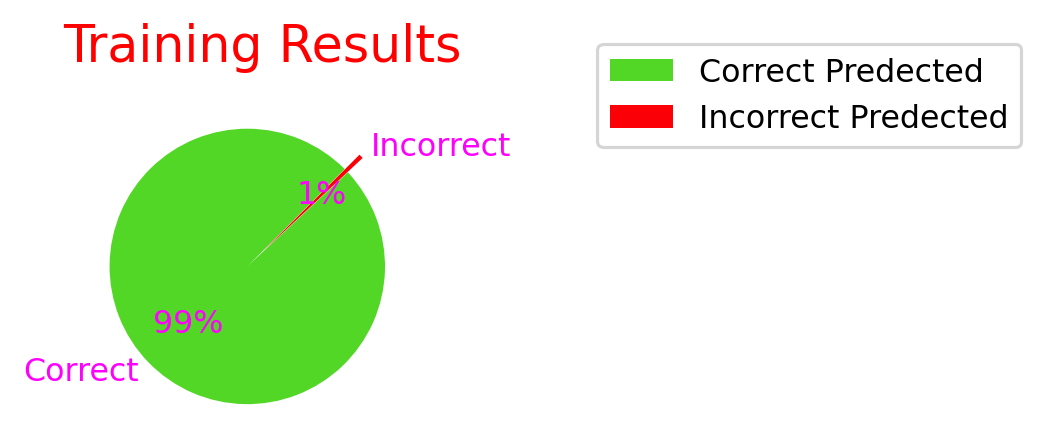

In [82]:
#pie chart visualisation of Results of Validation data
size=[nr_correct_train,nr_incorrect_train]
plt.figure(figsize=(2,2),dpi=228)
offset = [0.15, 0.00]
plt.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'magenta'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["#52D726","#FB0007"])
plt.title("Training Results",fontdict={"size":16,"color":'red'})
plt.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(2.75, 1.15))
plt.show()

In [83]:
nr_correct_valid = (y_valid == classifier.predict(X_valid)).sum()
nr_correct_valid

429

In [84]:
nr_incorrect_valid = y_valid.size - nr_correct_valid
nr_incorrect_valid

16

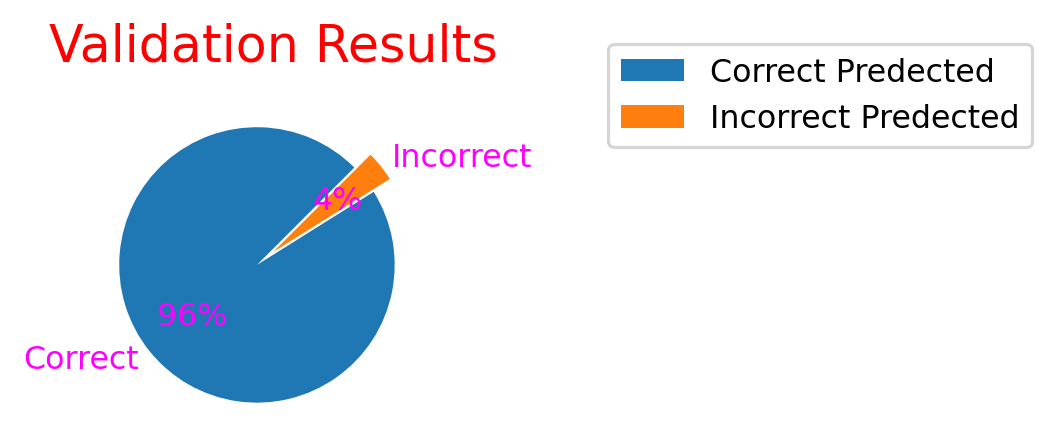

In [85]:
#pie chart visualisation of Results of Validation data
size=[nr_correct_valid,nr_incorrect_valid]
plt.figure(figsize=(2,2),dpi=228)
offset = [0.15, 0.00]
plt.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'magenta'},startangle=45,autopct='%1.00f%%', explode=offset)
plt.title("Validation Results",fontdict={"size":16,"color":'red'})
plt.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(2.75, 1.15))
plt.show()

In [86]:
Model2_Percent_Correct_pred_train = round(nr_correct_train/y_train.shape[0] *100,2)
Model2_Percent_Correct_pred_valid = round(nr_correct_valid/y_valid.shape[0] *100,2)

In [87]:
print(accuracy_score(y_valid ,classifier.predict(X_valid)))
print(precision_score(y_valid ,classifier.predict(X_valid),average='macro'))
print(recall_score(y_valid ,classifier.predict(X_valid),average='macro'))
print(f1_score(y_valid ,classifier.predict(X_valid),average='macro'))

0.9640449438202248
0.9641742099404558
0.9630492722776088
0.9631687628523011


In [88]:
Models_data=Models_data.append(dict(zip(columns,["Naive Bayes",100 * accuracy_score(y_train ,classifier.predict(X_train)),100*precision_score(y_train,classifier.predict(X_train),average='macro'),100*recall_score(y_train,classifier.predict(X_train),average='micro'),100*f1_score(y_train,classifier.predict(X_train),average='weighted'),accuracy_score(y_valid ,classifier.predict(X_valid))*100,100*precision_score(y_valid ,classifier.predict(X_valid),average='macro'),100*recall_score(y_valid ,classifier.predict(X_valid),average='macro'),100*f1_score(y_valid ,classifier.predict(X_valid),average='macro')])),ignore_index=True)

In [89]:
Models_data

,Title,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Valid_Accuracy,Valid_Precision,Valid_Recall,Valid_F1-Score
0,Multi Layer Perceptron,87.415731,100.000000,100.000000,100.000000,96.629214,96.585538,96.621380,96.581221
1,Naive Bayes,99.475655,99.406046,99.475655,99.476719,96.404494,96.417421,96.304927,96.316876


# KNeighborsClassifier

Other Similar Algorithms : https://scikit-learn.org/stable/modules/multiclass.html

<p>
We'll Again Use same <br>
X_train, y_train<br>
X_test, y_test<br>
X_valid, y_valid      data <br></p.

In [90]:
y_test = y_test.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
labels

['tech', 'business', 'sport', 'entertainment', 'politics']

In [92]:
transformer=TfidfTransformer()

In [93]:
KNN_models_list = list()
KNN_models_list.append(('KNN10', KNeighborsClassifier(n_neighbors=10)))
KNN_models_list.append(('KNN12', KNeighborsClassifier(n_neighbors=12)))
KNN_models_list.append(('KNN14', KNeighborsClassifier(n_neighbors=14)))
KNN_models_list.append(('KNN16', KNeighborsClassifier(n_neighbors=16)))
KNN_models_list.append(('KNN18', KNeighborsClassifier(n_neighbors=18)))
# define the voting ensemble
KNN_ensemble = VotingClassifier(estimators=KNN_models_list, voting='hard')

In [94]:

KNN_models=dict()
KNN_models['KNN10']=KNeighborsClassifier(n_neighbors=10,algorithm='kd_tree',weights='distance')
KNN_models['KNN12']=KNeighborsClassifier(n_neighbors=12,algorithm='kd_tree',weights='distance')
KNN_models['KNN14']=KNeighborsClassifier(n_neighbors=14,algorithm='kd_tree',weights='distance')
KNN_models['KNN16']=KNeighborsClassifier(n_neighbors=16,algorithm='kd_tree',weights='distance')
KNN_models['KNN18']=KNeighborsClassifier(n_neighbors=18,algorithm='kd_tree',weights='distance')
KNN_ensemble = VotingClassifier(estimators=KNN_models_list, voting='soft')
KNN_models["Soft Voting"]=KNN_ensemble
def evaluate_KNN(model, X, y):
    X= transformer.fit_transform(X)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [95]:
results, names = list(), list()
for name, model in KNN_models.items():
    scores = evaluate_KNN(model, data_cleaned,data.category)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>KNN10 0.945 (0.012)
>KNN12 0.945 (0.013)
>KNN14 0.946 (0.014)
>KNN16 0.947 (0.012)
>KNN18 0.950 (0.010)
>Soft Voting 0.942 (0.013)


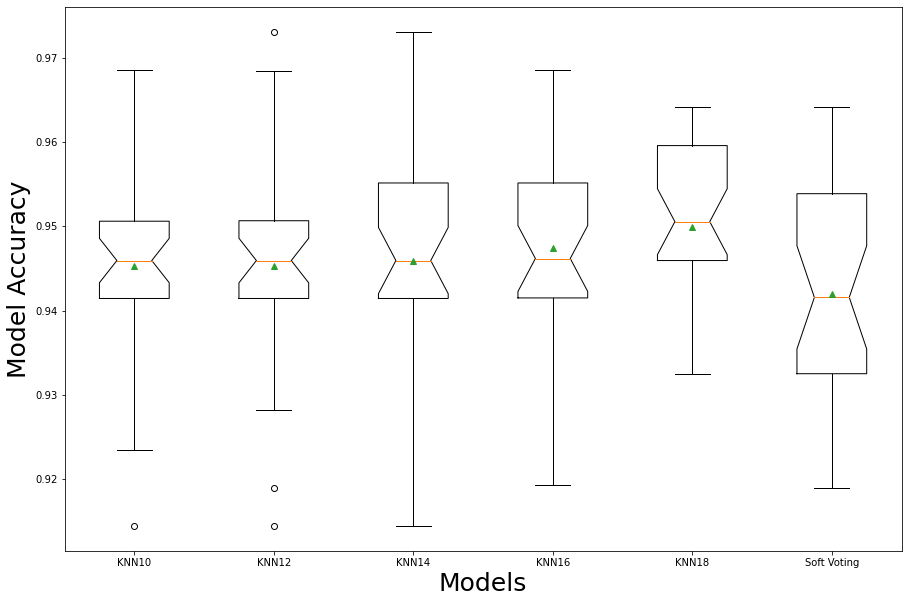

In [96]:
plt.figure(figsize=(15,10))
plt.xlabel("Models",fontsize=25)
plt.ylabel("Model Accuracy",fontsize=25)
plt.boxplot(results, labels=names, showmeans=True,notch=True,whis=2,)
plt.show()

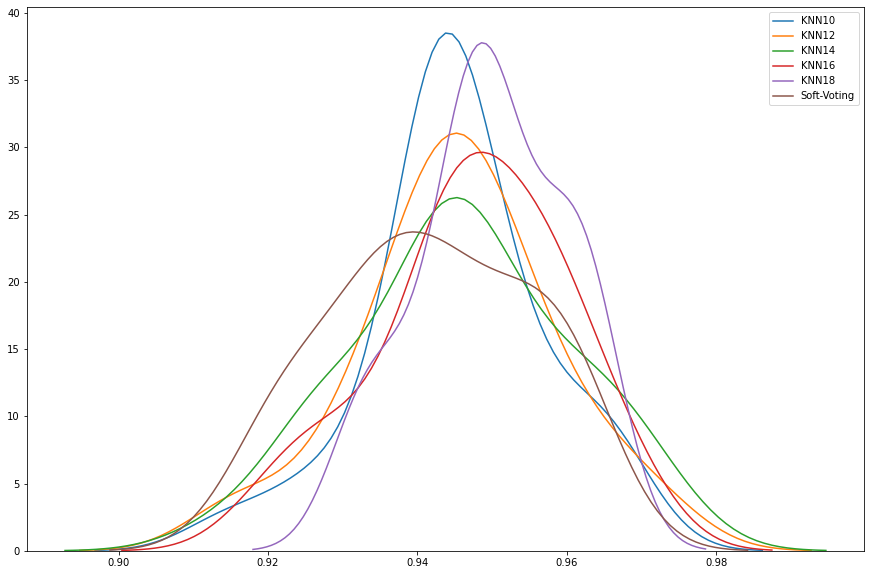

In [97]:
plt.figure(figsize=(15,10))
sns.distplot(results[0],kde=True,hist=False,label="KNN10") #",data=pd.DataFrame({"names":names,"KNN_MEAN":KNN_MEAN}))
sns.distplot(results[1],kde=True,hist=False,label="KNN12")
sns.distplot(results[2],kde=True,hist=False,label="KNN14")
sns.distplot(results[3],kde=True,hist=False,label="KNN16")
sns.distplot(results[4],kde=True,hist=False,label="KNN18")
sns.distplot(results[5],kde=True,hist=False,label="Soft-Voting")
plt.show()

In [98]:
#since KNN9 is Doing Best in The Data Set se we use KNN 9 as KNN Final Classifier
KNN_Classifier = KNN_models['KNN18']
knn=KNN_Classifier

In [99]:
transformer = TfidfTransformer()
X_train_new= transformer.fit_transform(X_train)

In [100]:
knn_fit=knn.fit(X_train_new,y_train)

/home/baddy/miniconda3/lib/python3.7/site-packages/sklearn/neighbors/_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [101]:
prediction_knn_valid = knn.predict(X_valid)

In [102]:
nr_correct_knn_valid = (y_valid == prediction_knn_valid).sum()
nr_incorrect_knn_valid = y_valid.shape[0] - nr_correct_knn_valid

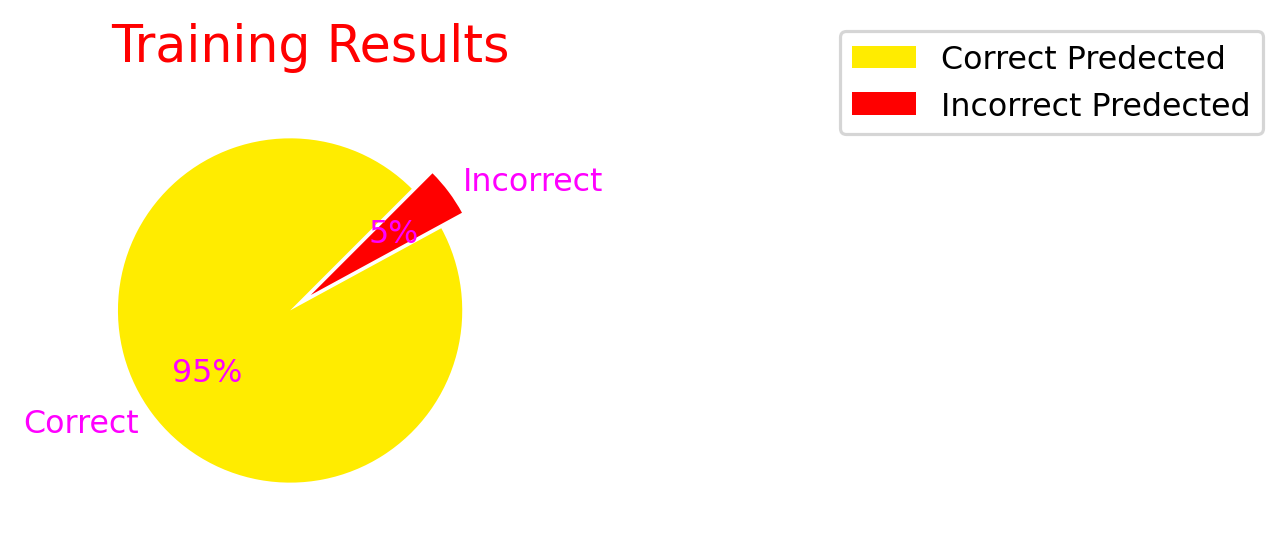

In [103]:
#pie chart visualisation of Results of Training data

size=[(y_train == knn.predict(X_train)).sum(),(y_train != knn.predict(X_train)).sum()]
plt.figure(figsize=(2.5,2.5),dpi=228)
offset = [0.15, 0.00]
plt.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'magenta'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["#FFEC00",'red'])
plt.title("Training Results",fontdict={"size":16,"color":'red'})
plt.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(2.75, 1.15))
plt.show()

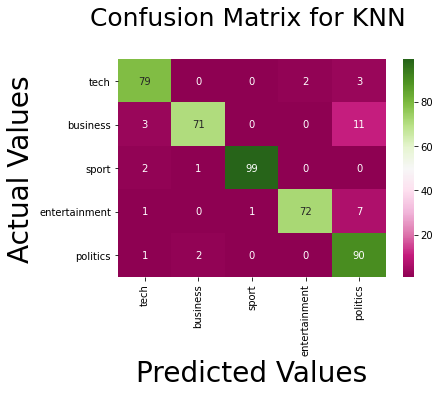

In [104]:
cf_valid=confusion_matrix(y_valid,knn.predict(X_valid))
sns.heatmap(cf_valid,cmap="PiYG", annot = True, fmt = "d",square=False,vmin=1,linecolor="red",xticklabels=labels,yticklabels=labels)
plt.ylabel('Actual Values', fontsize = 28)
plt.xlabel('Predicted Values', fontsize = 28)
plt.title('Confusion Matrix for KNN \n', fontsize = 25)
plt.show()

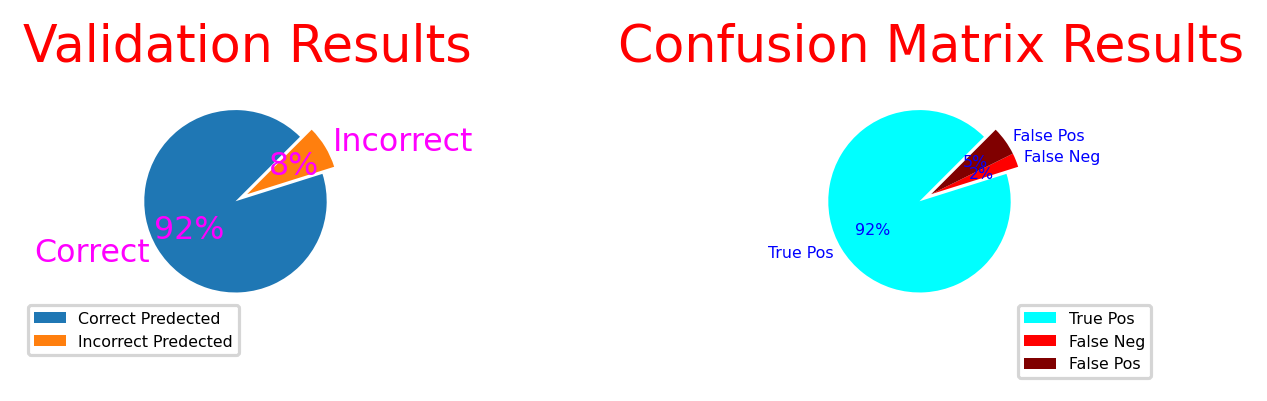

In [105]:
#pie chart visualisation of Results of Validation data
fig=plt.figure(figsize=(2,2),dpi=228)
ax3 = fig.add_axes([0, 0, .5, .5], aspect=1)
offset = [0.15, 0.00]
ax3.pie([(y_valid == knn.predict(X_valid)).sum(),(y_valid != knn.predict(X_valid)).sum()],labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'magenta'},startangle=45,autopct='%1.00f%%', explode=offset)
ax3.set_title("Validation Results",fontdict={"size":16,"color":'red'})
ax3.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(000.5, 0.05),prop={'size': 5})



size=[abs(cf_valid.diagonal().sum()),abs(np.tril(cf_valid).sum()-cf_valid.diagonal().sum()),abs(np.triu(cf_valid).sum()-cf_valid.diagonal().sum())]
ax4 = fig.add_axes([1.5, .0, .5, .5], aspect=1)
offset = [0.15, 0.00,0.0]
ax4.pie(size,labels=["True Pos","False Neg","False Pos"],textprops={'fontsize':5,'color':'blue'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["cyan",'red',"maroon"])
ax4.set_title("Confusion Matrix Results",fontdict={"size":16,"color":'red'})
ax4.legend(labels=["True Pos","False Neg","False Pos"],bbox_to_anchor =(001.50, 0.05),prop={'size': 5})

plt.show()

In [106]:
print("Validation Datasets Results","--"*30)
print("Precision is {:0.02%} ".format(precision_score(y_valid.values,knn.predict(X_valid),average="macro")))
print("Recall is {:0.02%} ".format(recall_score(y_valid.values,knn.predict(X_valid),average="macro")))
print("F1-Score is {:0.02%} ".format(f1_score(y_valid.values,knn.predict(X_valid),average="macro")))

Validation Datasets Results ------------------------------------------------------------
Precision is 93.04% 
Recall is 92.06% 
F1-Score is 92.28% 


In [107]:
print("Testing Datasets Results","--"*30)
print("Precision is {:0.02%} ".format(precision_score(y_test.values,knn.predict(X_test),average="macro")))
print("Recall is {:0.02%} ".format(recall_score(y_test.values,knn.predict(X_test),average="macro")))
print("F1-Score is {:0.02%} ".format(f1_score(y_test.values,knn.predict(X_test),average="macro")))

Testing Datasets Results ------------------------------------------------------------
Precision is 93.97% 
Recall is 93.50% 
F1-Score is 93.55% 


In [108]:
Models_data=Models_data.append(dict(zip(columns,["KNeighborsClassifier",100 * accuracy_score(y_train ,knn.predict(X_train)),100*precision_score(y_train,knn.predict(X_train),average='macro'),100*recall_score(y_train,knn.predict(X_train),average='micro'),100*f1_score(y_train,knn.predict(X_train),average='weighted'),accuracy_score(y_valid ,knn.predict(X_valid))*100,100*precision_score(y_valid ,knn.predict(X_valid),average='macro'),100*recall_score(y_valid ,knn.predict(X_valid),average='macro'),100*f1_score(y_valid ,knn.predict(X_valid),average='macro')])),ignore_index=True)

In [109]:
Models_data

,Title,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Valid_Accuracy,Valid_Precision,Valid_Recall,Valid_F1-Score
0,Multi Layer Perceptron,87.415731,100.000000,100.000000,100.000000,96.629214,96.585538,96.621380,96.581221
1,Naive Bayes,99.475655,99.406046,99.475655,99.476719,96.404494,96.417421,96.304927,96.316876
2,KNeighborsClassifier,95.430712,95.240987,95.430712,95.448296,92.359551,93.036958,92.059787,92.281535


# Model 4 : DecisionTreeClassifier

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
DTC_models_list = list()
DTC_models_list.append(('DTC20', DecisionTreeClassifier(random_state=0,max_depth=20,splitter='random')))
DTC_models_list.append(('DTC25', DecisionTreeClassifier(random_state=0,max_depth=25,splitter='random')))
DTC_models_list.append(('DTC30', DecisionTreeClassifier(random_state=0,max_depth=30,splitter='random')))
DTC_models_list.append(('DTC35', DecisionTreeClassifier(random_state=0,max_depth=35,splitter='random')))
DTC_models_list.append(('DTC40', DecisionTreeClassifier(random_state=0,max_depth=40,splitter='random')))
# define the voting ensemble
DTC_ensemble = VotingClassifier(estimators=DTC_models_list, voting='hard')

In [112]:
DTC_models=dict()
DTC_models['DTC20']=DecisionTreeClassifier(random_state=0,max_depth=20,splitter='random')
DTC_models['DTC25']=DecisionTreeClassifier(random_state=0,max_depth=25,splitter='random')
DTC_models['DTC30']=DecisionTreeClassifier(random_state=0,max_depth=30,splitter='random')
DTC_models['DTC35']=DecisionTreeClassifier(random_state=0,max_depth=35,splitter='random')
DTC_models['DTC40']=DecisionTreeClassifier(random_state=0,max_depth=40,splitter='random')
DTC_ensemble = VotingClassifier(estimators=DTC_models_list, voting='soft')
DTC_models["Soft Voting"]=DTC_ensemble
def evaluate_DTC(model, X, y):
    X= transformer.fit_transform(X)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [113]:
results, names = list(), list()
for name, model in DTC_models.items():
    scores = evaluate_DTC(model, data_cleaned,data.category)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>DTC20 0.813 (0.024)
>DTC25 0.822 (0.027)
>DTC30 0.827 (0.031)
>DTC35 0.828 (0.027)
>DTC40 0.835 (0.026)
>Soft Voting 0.855 (0.028)


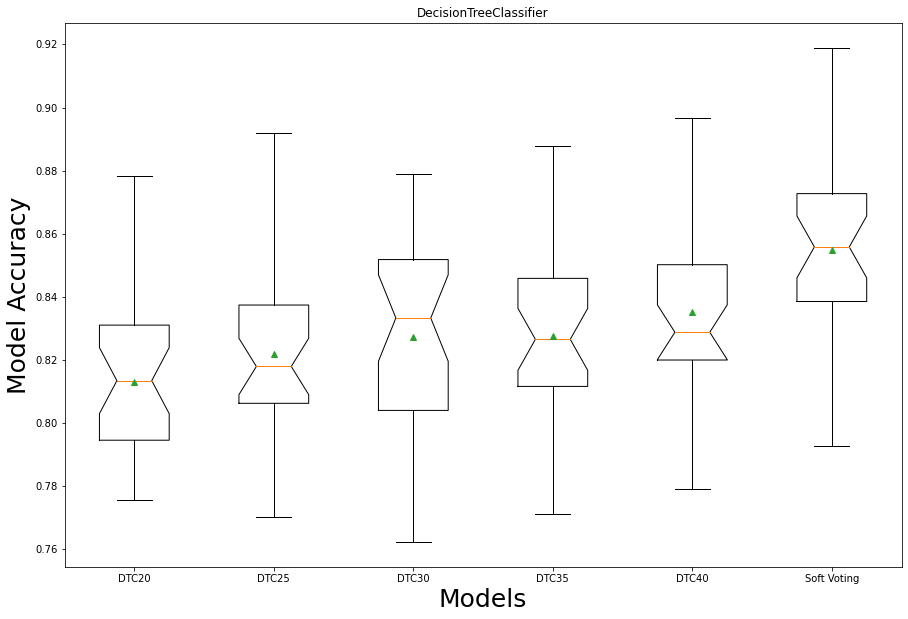

In [114]:
plt.figure(figsize=(15,10))
plt.title("DecisionTreeClassifier")
plt.xlabel("Models",fontsize=25)
plt.ylabel("Model Accuracy",fontsize=25)
plt.boxplot(results, labels=names, showmeans=True,notch=True,whis=2,)
plt.show()

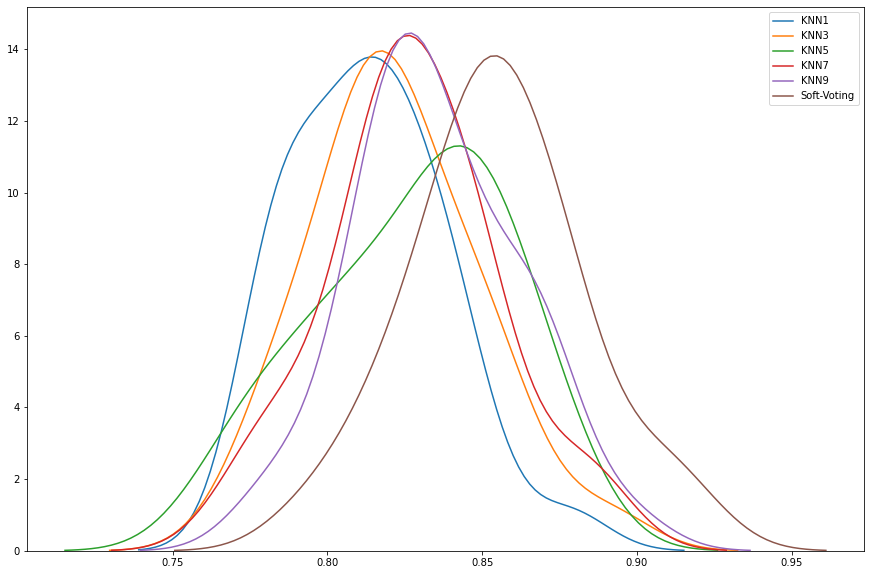

In [115]:
plt.figure(figsize=(15,10))
sns.distplot(results[0],kde=True,hist=False,label="KNN1") #",data=pd.DataFrame({"names":names,"KNN_MEAN":KNN_MEAN}))
sns.distplot(results[1],kde=True,hist=False,label="KNN3")
sns.distplot(results[2],kde=True,hist=False,label="KNN5")
sns.distplot(results[3],kde=True,hist=False,label="KNN7")
sns.distplot(results[4],kde=True,hist=False,label="KNN9")
sns.distplot(results[5],kde=True,hist=False,label="Soft-Voting")
plt.show()

In [116]:
#since DTC Soft Voting is Doing Best in The Data Set se we use DTC Soft Voting as KNN Final Classifier
DTC_Classifier = DTC_models['Soft Voting']

In [117]:
transformer = TfidfTransformer()

In [118]:
X_train_DTC= transformer.fit_transform(X_train)
DTC_Classifier.fit(X_train_DTC,y_train)

VotingClassifier(estimators=[('DTC20',
                              DecisionTreeClassifier(max_depth=20,
                                                     random_state=0,
                                                     splitter='random')),
                             ('DTC25',
                              DecisionTreeClassifier(max_depth=25,
                                                     random_state=0,
                                                     splitter='random')),
                             ('DTC30',
                              DecisionTreeClassifier(max_depth=30,
                                                     random_state=0,
                                                     splitter='random')),
                             ('DTC35',
                              DecisionTreeClassifier(max_depth=35,
                                                     random_state=0,
                                                     splitter='random')),
    

In [119]:
decision_tree_valid_prediction = DTC_Classifier.predict(X_valid)

In [120]:
(decision_tree_valid_prediction==y_valid).sum()

360

In [121]:
(DTC_Classifier.predict(X_test)==y_test).sum()

361

In [122]:
Models_data=Models_data.append(dict(zip(columns,["DecisionTreeClassifier",100 * accuracy_score(y_train ,DTC_Classifier.predict(X_train)),100*precision_score(y_train,DTC_Classifier.predict(X_train),average='macro'),100*recall_score(y_train,DTC_Classifier.predict(X_train),average='micro'),100*f1_score(y_train,DTC_Classifier.predict(X_train),average='weighted'),accuracy_score(y_valid ,DTC_Classifier.predict(X_valid))*100,100*precision_score(y_valid ,DTC_Classifier.predict(X_valid),average='macro'),100*recall_score(y_valid ,DTC_Classifier.predict(X_valid),average='macro'),100*f1_score(y_valid ,DTC_Classifier.predict(X_valid),average='macro')])),ignore_index=True)

In [123]:
Models_data

,Title,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Valid_Accuracy,Valid_Precision,Valid_Recall,Valid_F1-Score
0,Multi Layer Perceptron,87.415731,100.000000,100.000000,100.000000,96.629214,96.585538,96.621380,96.581221
1,Naive Bayes,99.475655,99.406046,99.475655,99.476719,96.404494,96.417421,96.304927,96.316876
2,KNeighborsClassifier,95.430712,95.240987,95.430712,95.448296,92.359551,93.036958,92.059787,92.281535
3,DecisionTreeClassifier,96.928839,96.734929,96.928839,96.936021,80.898876,81.083989,80.351368,80.433516


# Model 5 : RandomForestClassifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [125]:
RFC_models_list = list()
RFC_models_list.append(('RFC10', RandomForestClassifier(n_estimators=200,max_depth=10,criterion='entropy')))
RFC_models_list.append(('RFC15', RandomForestClassifier(n_estimators=200,max_depth=15,criterion='entropy')))
RFC_models_list.append(('RFC20', RandomForestClassifier(n_estimators=200,max_depth=20,criterion='entropy')))
RFC_models_list.append(('RFC25', RandomForestClassifier(n_estimators=200,max_depth=25,criterion='entropy')))
RFC_models_list.append(('RFC30', RandomForestClassifier(n_estimators=200,max_depth=30,criterion='entropy')))
# define the voting ensemble
RFC_ensemble = VotingClassifier(estimators=RFC_models_list, voting='hard')

In [126]:
RFC_models=dict()
RFC_models['RFC10']=RandomForestClassifier(n_estimators=200,max_depth=10,criterion='entropy')
RFC_models['RFC15']=RandomForestClassifier(n_estimators=200,max_depth=15,criterion='entropy')
RFC_models['RFC20']=RandomForestClassifier(n_estimators=200,max_depth=20,criterion='entropy')
RFC_models['RFC25']=RandomForestClassifier(n_estimators=200,max_depth=25,criterion='entropy')
RFC_models['RFC30']=RandomForestClassifier(n_estimators=200,max_depth=30,criterion='entropy')
RFC_ensemble = VotingClassifier(estimators=RFC_models_list, voting='soft')
RFC_models["Soft Voting"]=RFC_ensemble
def evaluate_RFC(model, X, y):
    X= transformer.fit_transform(X)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [127]:
results, names = list(), list()
for name, model in RFC_models.items():
    scores = evaluate_RFC(model, data_cleaned,data.category)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>RFC10 0.948 (0.011)
>RFC15 0.961 (0.008)
>RFC20 0.962 (0.011)
>RFC25 0.965 (0.009)
>RFC30 0.964 (0.010)
>Soft Voting 0.964 (0.010)


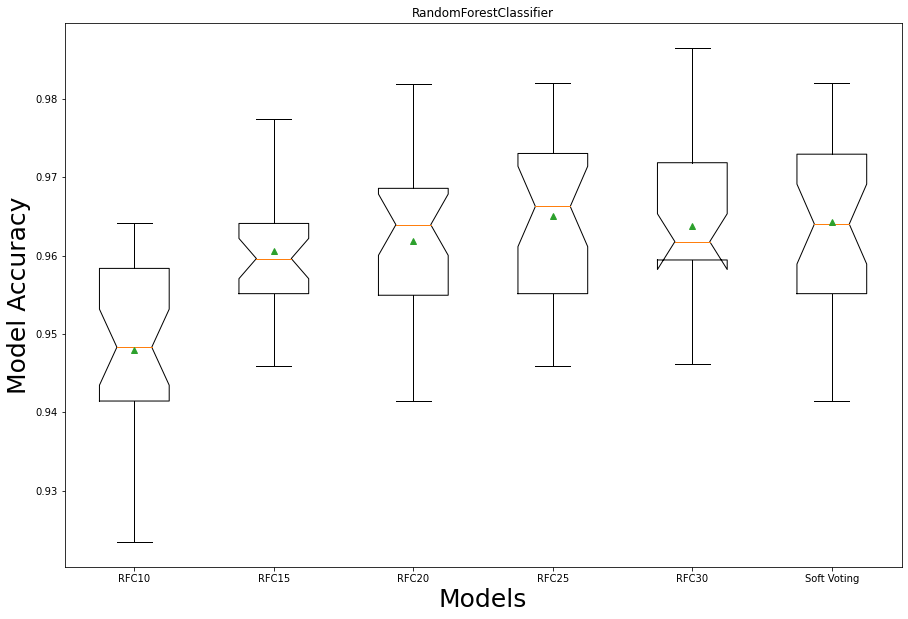

In [128]:
plt.figure(figsize=(15,10))
plt.title("RandomForestClassifier")
plt.xlabel("Models",fontsize=25)
plt.ylabel("Model Accuracy",fontsize=25)
plt.boxplot(results, labels=names, showmeans=True,notch=True,whis=2,)
plt.show()

In [129]:
#since RFC SoftVoting is Doing Best in The Data Set se we use Softvoting as KNN Final Classifier
RFC_Classifier = RFC_models["Soft Voting"]
RFC_Classifier

VotingClassifier(estimators=[('RFC10',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     n_estimators=200)),
                             ('RFC15',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     n_estimators=200)),
                             ('RFC20',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=20,
                                                     n_estimators=200)),
                             ('RFC25',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=25,
                                                     n_estima

In [130]:
#in algorithms like Random Forest TFIDF did not play much role in performance so we removed it
#transformer = TfidfTransformer()
#X_train_RFC= transformer.fit_transform(X_train)
#X_train_RFC = X_train

In [131]:
sc = StandardScaler(with_mean=False)
X_train_RFC = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [132]:
RFC = RFC_Classifier
RFC.fit(X_train_RFC,y_train)

VotingClassifier(estimators=[('RFC10',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     n_estimators=200)),
                             ('RFC15',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     n_estimators=200)),
                             ('RFC20',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=20,
                                                     n_estimators=200)),
                             ('RFC25',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=25,
                                                     n_estima

In [133]:
random_forest_valid_prediction = RFC.predict(X_valid)

In [134]:
random_forest_valid_prediction_correct = (random_forest_valid_prediction==y_valid).sum()
random_forest_valid_prediction_incorrect = (random_forest_valid_prediction != y_valid).sum()

In [135]:
print("Accuracy Of RandomForestClassifier on Validation Dataset is \t{:.2%}".format
      (random_forest_valid_prediction_correct/y_valid.shape[0]))

Accuracy Of RandomForestClassifier on Validation Dataset is 	93.26%


In [136]:
RFC_CF_train = confusion_matrix(y_train,RFC.predict(X_train_RFC))
RFC_CF_train

array([[231,   0,   0,   0,   0],
       [  0, 319,   0,   0,   0],
       [  0,   0, 308,   0,   0],
       [  0,   0,   0, 239,   0],
       [  0,   0,   0,   0, 238]])

In [137]:
accuracy_score(y_train,RFC.predict(X_train_RFC)),accuracy_score(y_test,RFC.predict(X_test))

(1.0, 0.9550561797752809)

In [138]:
accuracy_score(y_train ,RFC.predict(X_train_RFC))

1.0

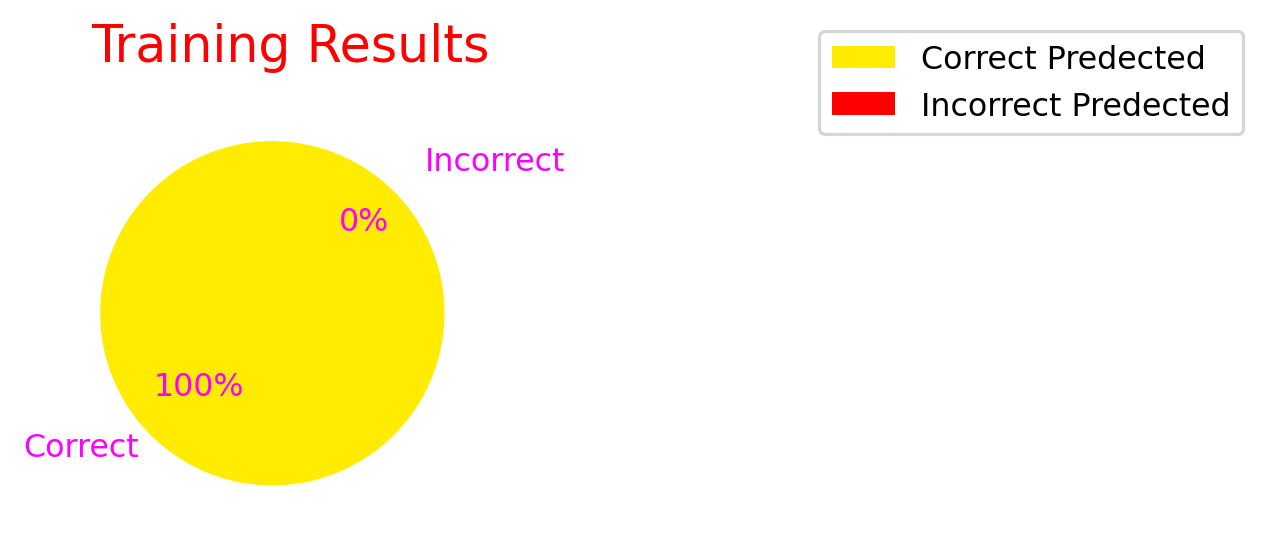

In [139]:
#pie chart visualisation of Results of Training data

size=[(y_train == RFC.predict(X_train_RFC)).sum(),(y_train != RFC.predict(X_train_RFC)).sum()]
plt.figure(figsize=(2.5,2.5),dpi=228)
offset = [0.15, 0.00]
plt.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'magenta'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["#FFEC00",'red'])
plt.title("Training Results",fontdict={"size":16,"color":'red'})
plt.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(2.75, 1.15))
plt.show()

In [140]:
RFC_CF_valid = confusion_matrix(y_valid,RFC.predict(X_valid))
RFC_CF_valid

array([[ 76,   3,   2,   3,   0],
       [  2,  80,   0,   0,   3],
       [  0,   1, 100,   0,   1],
       [  0,   2,   1,  77,   1],
       [  0,   9,   2,   0,  82]])

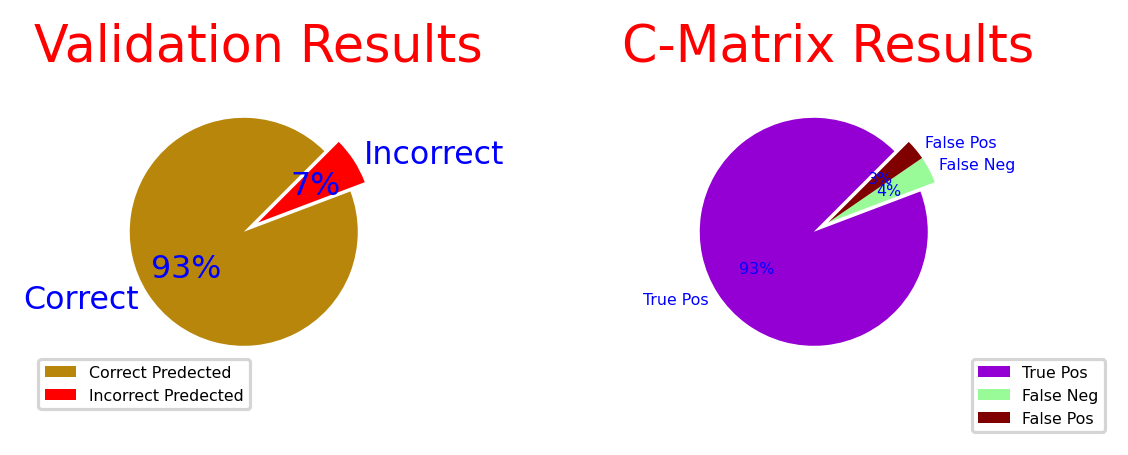

In [141]:
size=[(y_valid == RFC.predict(X_valid)).sum(),(y_valid != RFC.predict(X_valid)).sum()]
fig = plt.figure(figsize=(2.5,2.5),dpi=228)
offset = [0.15, 0.00]
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'blue'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["darkgoldenrod",'red'])
ax1.set_title("Validation Results",fontdict={"size":16,"color":'red'})
ax1.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(000.5, 0.05),prop={'size': 5})

ax2 = fig.add_axes([1, .0, .5, .5], aspect=1)
size=[abs(RFC_CF_valid.diagonal().sum()),abs(np.tril(RFC_CF_valid).sum()-RFC_CF_valid.diagonal().sum()),abs(np.triu(RFC_CF_valid).sum()-RFC_CF_valid.diagonal().sum())]

offset = [0.15, 0.00,0.0]
ax2.pie(size,labels=["True Pos","False Neg","False Pos"],textprops={'fontsize':5,'color':'blue'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["darkviolet",'palegreen',"maroon"])
ax2.set_title("C-Matrix Results",fontdict={"size":16,"color":'red'})
ax2.legend(labels=["True Pos","False Neg","False Pos"],bbox_to_anchor =(001.50, 0.05),prop={'size': 5})
plt.show()

In [142]:
print("Validation Datasets Results","--"*30)

print("Accuracy in Validation is \t{:0.02%} ".format(accuracy_score(y_valid.values,RFC.predict(X_valid))))
print("Precision is \t{:0.02%} ".format(precision_score(y_valid.values,RFC.predict(X_valid),average="macro")))
print("Recall is\t {:0.02%} ".format(recall_score(y_valid.values,RFC.predict(X_valid),average="macro")))
print("F1-Score is \t{:0.02%} ".format(f1_score(y_valid.values,RFC.predict(X_valid),average="macro")))

Validation Datasets Results ------------------------------------------------------------
Accuracy in Validation is 	93.26% 
Precision is 	93.48% 
Recall is	 93.17% 
F1-Score is 	93.22% 


In [143]:
Models_data=Models_data.append(dict(zip(columns,["RandomForestClassifier",100 * accuracy_score(y_train ,RFC.predict(X_train_RFC)),100*precision_score(y_train,RFC.predict(X_train_RFC),average='macro'),100*recall_score(y_train,RFC.predict(X_train_RFC),average='micro'),100*f1_score(y_train,RFC.predict(X_train_RFC),average='weighted'),accuracy_score(y_valid ,RFC.predict(X_valid))*100,100*precision_score(y_valid ,RFC.predict(X_valid),average='macro'),100*recall_score(y_valid ,RFC.predict(X_valid),average='macro'),100*f1_score(y_valid ,RFC.predict(X_valid),average='macro')])),ignore_index=True)

In [144]:
Models_data

,Title,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Valid_Accuracy,Valid_Precision,Valid_Recall,Valid_F1-Score
0,Multi Layer Perceptron,87.415731,100.000000,100.000000,100.000000,96.629214,96.585538,96.621380,96.581221
1,Naive Bayes,99.475655,99.406046,99.475655,99.476719,96.404494,96.417421,96.304927,96.316876
2,KNeighborsClassifier,95.430712,95.240987,95.430712,95.448296,92.359551,93.036958,92.059787,92.281535
3,DecisionTreeClassifier,96.928839,96.734929,96.928839,96.936021,80.898876,81.083989,80.351368,80.433516
4,RandomForestClassifier,100.000000,100.000000,100.000000,100.000000,93.258427,93.477479,93.173365,93.219538


In [145]:
RFC_Classifier

VotingClassifier(estimators=[('RFC10',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     n_estimators=200)),
                             ('RFC15',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     n_estimators=200)),
                             ('RFC20',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=20,
                                                     n_estimators=200)),
                             ('RFC25',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=25,
                                                     n_estima

In [146]:
accuracy_score(y_train ,RFC.predict(X_train))

0.9827715355805243

<code>
        Inference:
        
        1- Term Frequency (TFIDF) is Not making Much Difference in Accuracy of 
            Model so We Discarted
        
        2- StandardScaler is used and it updated the Accuracy upto 2-2.5%
        
        3- if We keep criterion='sqrt' it Overfit the data so criterion='entropy'
    
        4- using criterion='entropy' accuracy decrease by 2% but it Overfitted the Training
    
        5- using max_depth = 10 we maintain the accuracy of Train,Validation,Test 
            to 98.8%, 91.9%, 93.2% respectively
    
        6- Max Validation accuracy achieved is 95% but it Overfit the Data
</code>

## Voting 

In [147]:
FINAL_models = list()
FINAL_models.append(('Naive Bayes',classifier ))
FINAL_models.append(('KNeighborsClassifier', KNN_Classifier))
FINAL_models.append(('DecisionTreeClassifier', DTC_Classifier))
FINAL_models.append(('RandomForestClassifier', RFC_Classifier))
FINAL_ensemble = VotingClassifier(estimators=FINAL_models, voting='soft')

In [148]:
FINAL_models

[('Naive Bayes', MultinomialNB()),
 ('KNeighborsClassifier',
  KNeighborsClassifier(algorithm='kd_tree', n_neighbors=18, weights='distance')),
 ('DecisionTreeClassifier',
  VotingClassifier(estimators=[('DTC20',
                                DecisionTreeClassifier(max_depth=20,
                                                       random_state=0,
                                                       splitter='random')),
                               ('DTC25',
                                DecisionTreeClassifier(max_depth=25,
                                                       random_state=0,
                                                       splitter='random')),
                               ('DTC30',
                                DecisionTreeClassifier(max_depth=30,
                                                       random_state=0,
                                                       splitter='random')),
                               ('DTC35',
                 

In [149]:
FINAL_ensemble

VotingClassifier(estimators=[('Naive Bayes', MultinomialNB()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   n_neighbors=18,
                                                   weights='distance')),
                             ('DecisionTreeClassifier',
                              VotingClassifier(estimators=[('DTC20',
                                                            DecisionTreeClassifier(max_depth=20,
                                                                                   random_state=0,
                                                                                   splitter='random')),
                                                           ('DTC25',
                                                            DecisionTreeClassifier(max_depth=25,
                                                                                

# ENSEMBLE the Models

In [150]:
Models_data

,Title,Train_Accuracy,Train_Precision,Train_Recall,Train_F1-Score,Valid_Accuracy,Valid_Precision,Valid_Recall,Valid_F1-Score
0,Multi Layer Perceptron,87.415731,100.000000,100.000000,100.000000,96.629214,96.585538,96.621380,96.581221
1,Naive Bayes,99.475655,99.406046,99.475655,99.476719,96.404494,96.417421,96.304927,96.316876
2,KNeighborsClassifier,95.430712,95.240987,95.430712,95.448296,92.359551,93.036958,92.059787,92.281535
3,DecisionTreeClassifier,96.928839,96.734929,96.928839,96.936021,80.898876,81.083989,80.351368,80.433516
4,RandomForestClassifier,100.000000,100.000000,100.000000,100.000000,93.258427,93.477479,93.173365,93.219538


<code>
Ans 2     : After Observation The Table , It is Clear that Naive Bayes with 99.47% 
            Training Accuracy and 96.3%       
            Validation Accuracy is The Best Algo For These Datasets
            
            Other Algo Also Perform Good like - KNN (95% , 93%) Random Forest Classifier (100% , 94%) 
            and MultiLayer Perceptron with  (86% , 97%) 
        
            
    But DecisionTree Algo didn't Perform in this Type Of Dataset having (92% , 81% ) Accuracy


</code>

# Ans 4 : Prediction Of Classes

<code>
    
Since , We have only use Training and Validating Dataset on All Algos and Out Test Dataset is 
        Untouched.
    
        So, We Will use out Test dataset for Final Prediction of Model 
    
        or You can use our Own sentence but for that we have to Preprocess 
            it and convert it into spase matrix
            out Train Dataset is Ready for That
</code>

In [151]:
FINAL_models_list = list()
FINAL_models_list.append(('Naive Bayes',classifier ))
FINAL_models_list.append(('KNeighborsClassifier', KNN_Classifier))
FINAL_models_list.append(('DecisionTreeClassifier', DTC_Classifier))
FINAL_models_list.append(('RandomForestClassifier', RFC_Classifier))
FINAL_ensemble = VotingClassifier(estimators=FINAL_models_list, voting='soft')

In [152]:
FINAL_models=dict()
FINAL_models['NB']=classifier
FINAL_models['KNN']=KNN_Classifier
FINAL_models['DTC']=DTC_Classifier
FINAL_models['RFC']=RFC_Classifier
FINAL_ensemble = VotingClassifier(estimators=FINAL_models_list, voting='soft')
FINAL_models["Soft Voting"]=FINAL_ensemble
def evaluate_FINAL(model, X, y):
    X= transformer.fit_transform(X)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [153]:
results, names = list(), list()
for name, model in FINAL_models.items():
    scores = evaluate_FINAL(model, data_cleaned,data.category)
    results.append(scores)
    names.append(name)
    print('>{} {:.2%} {:.2f}'.format(name, np.mean(scores), np.std(scores)))

>NB 96.85% 0.01
>KNN 95.00% 0.01
>DTC 85.48% 0.03
>RFC 96.31% 0.01
>Soft Voting 96.72% 0.01


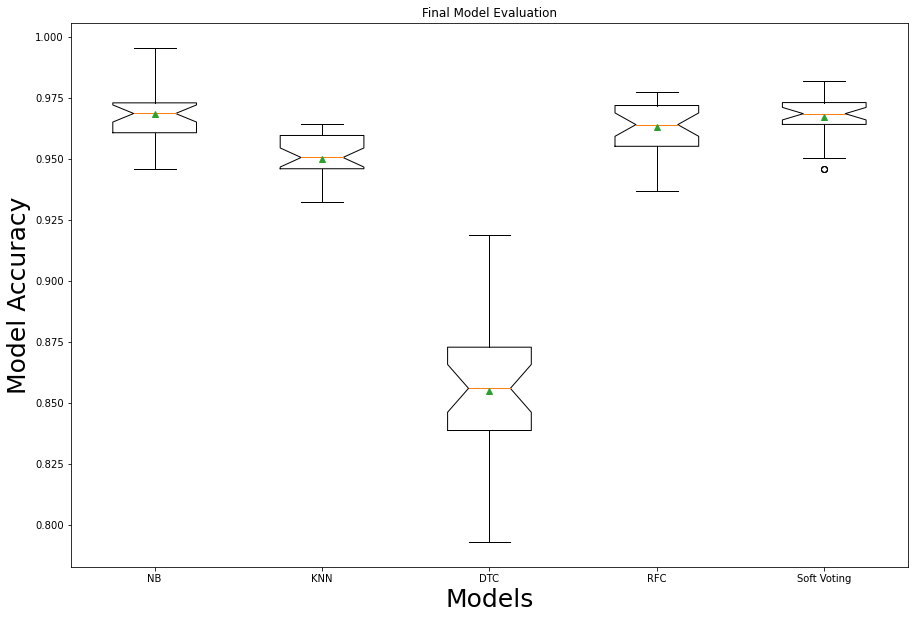

In [154]:
plt.figure(figsize=(15,10))
plt.title("Final Model Evaluation")
plt.xlabel("Models",fontsize=25)
plt.ylabel("Model Accuracy",fontsize=25)
plt.boxplot(results, labels=names, showmeans=True,notch=True,whis=2,)
plt.show()

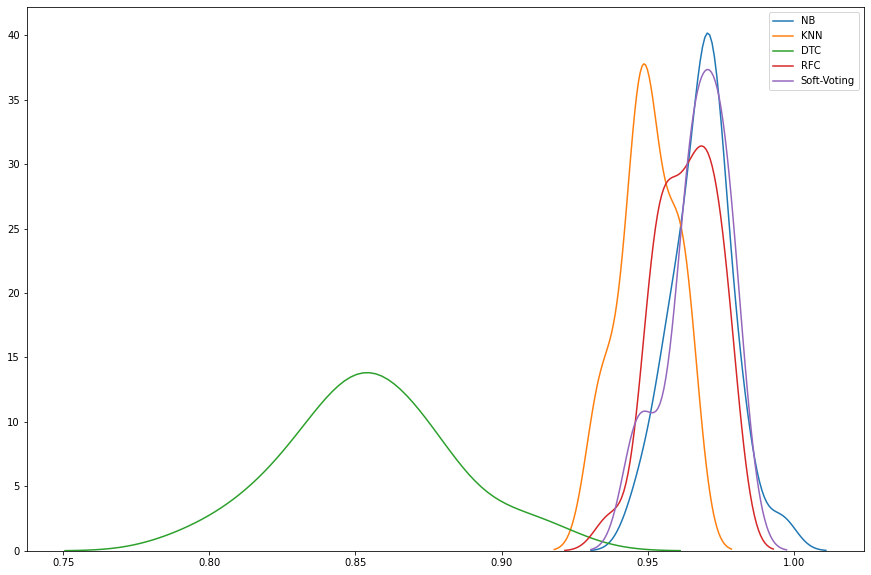

In [155]:
plt.figure(figsize=(15,10))
sns.distplot(results[0],kde=True,hist=False,label="NB") #",data=pd.DataFrame({"names":names,"KNN_MEAN":KNN_MEAN}))
sns.distplot(results[1],kde=True,hist=False,label="KNN")
sns.distplot(results[2],kde=True,hist=False,label="DTC")
sns.distplot(results[3],kde=True,hist=False,label="RFC")
sns.distplot(results[4],kde=True,hist=False,label="Soft-Voting")
plt.show()

In [156]:
#since SOFT VOTING is Doing Best in The Data Set se we use soft voting as Final Classifier
FINAL_classifier = FINAL_models["Soft Voting"]

In [157]:
FINAL_classifier

VotingClassifier(estimators=[('Naive Bayes', MultinomialNB()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   n_neighbors=18,
                                                   weights='distance')),
                             ('DecisionTreeClassifier',
                              VotingClassifier(estimators=[('DTC20',
                                                            DecisionTreeClassifier(max_depth=20,
                                                                                   random_state=0,
                                                                                   splitter='random')),
                                                           ('DTC25',
                                                            DecisionTreeClassifier(max_depth=25,
                                                                                

In [158]:
#fitting on a dataset for Final Prediction
FINAL_classifier.fit(X_train,y_train)

/home/baddy/miniconda3/lib/python3.7/site-packages/sklearn/neighbors/_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


VotingClassifier(estimators=[('Naive Bayes', MultinomialNB()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   n_neighbors=18,
                                                   weights='distance')),
                             ('DecisionTreeClassifier',
                              VotingClassifier(estimators=[('DTC20',
                                                            DecisionTreeClassifier(max_depth=20,
                                                                                   random_state=0,
                                                                                   splitter='random')),
                                                           ('DTC25',
                                                            DecisionTreeClassifier(max_depth=25,
                                                                                

# Using OUR Test Dataset

In [159]:
#final Score on Out Test Dataset
print("Results are out")
print("Accuracy of Ensamble Modelling is {:.2%}".format(accuracy_score(y_test,FINAL_classifier.predict(X_test))))
print("Recall of Ensamble Modelling is {:.2%}".format(recall_score(y_test,FINAL_classifier.predict(X_test),average="macro")))
print("Precision Score of Ensamble Modelling is {:.2%}".format(precision_score(y_test,FINAL_classifier.predict(X_test),average="macro")))
print("F1-Score of Ensamble Modelling is {:.2%}".format(f1_score(y_test,FINAL_classifier.predict(X_test),average="macro")))

Results are out
Accuracy of Ensamble Modelling is 93.48%
Recall of Ensamble Modelling is 93.02%
Precision Score of Ensamble Modelling is 94.56%
F1-Score of Ensamble Modelling is 93.53%


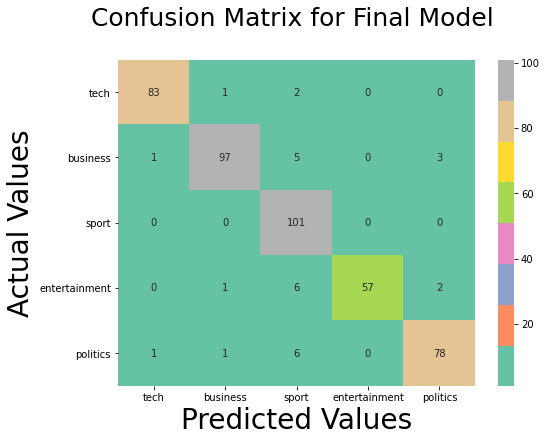

In [160]:
FINAL_testing=confusion_matrix(y_test,FINAL_classifier.predict(X_test))
FINAL_tp_fn=FINAL_testing.diagonal().sum()
FINAL_fn=np.tril(FINAL_testing).sum()-FINAL_tp_fn
FINAL_fp=np.triu(FINAL_testing).sum()-FINAL_tp_fn
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(FINAL_testing, annot = True, fmt = "d", cmap = "Set2",square=False,vmin=1,linecolor="red",xticklabels=labels,yticklabels=labels)
plt.ylabel('Actual Values', fontsize = 28)
plt.xlabel('Predicted Values', fontsize = 28)
plt.title('Confusion Matrix for Final Model \n', fontsize = 25)
plt.show()

In [161]:
labels

['tech', 'business', 'sport', 'entertainment', 'politics']

NameError: name 'tp_fn' is not defined

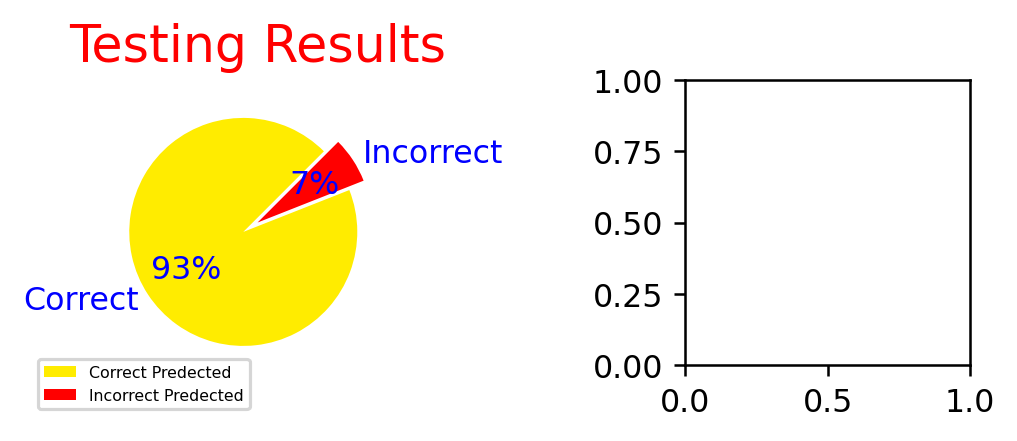

In [162]:
#pie chart visualisation of Results of Testing data

size=[(y_test == FINAL_classifier.predict(X_test)).sum(),(y_test != FINAL_classifier.predict(X_test)).sum()]
fig = plt.figure(figsize=(2.5,2.5),dpi=228)
offset = [0.15, 0.00]
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'blue'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["#FFEC00",'red'])
ax1.set_title("Testing Results",fontdict={"size":16,"color":'red'})
ax1.legend(labels=["Correct Predected","Incorrect Predected"],bbox_to_anchor =(000.5, 0.05),prop={'size': 5})

ax2 = fig.add_axes([1, .0, .5, .5], aspect=1)
size=[tp_fn,fn,fp]
offset = [0.15, 0.00,0.0]
ax2.pie(size,labels=["True Pos","False Neg","False Pos"],textprops={'fontsize':5,'color':'blue'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["lightgreen",'red',"maroon"])
ax2.set_title("Confusion Matrix Results",fontdict={"size":16,"color":'red'})
ax2.legend(labels=["True Pos","False Neg","False Pos"],bbox_to_anchor =(001.50, 0.05),prop={'size': 5})
plt.show()

# Note
### for Answer of Ques 1 go to  https://projector.tensorflow.org/
### on load section upload vecs.tsv  on Vector Section (Step 1) 
### and on  metadata section upload meta.tsv (step 2)

# THANK YOU !